In [1]:
import matplotlib.pyplot as plt
import numpy as np

# PCA by best fit line

|      | sample1  | sample2  |  sample3  | sample4  | sample5  | sample6  |
|---   |--- |---|---|---|---|---|
|feature 1 |10|11|8|3|2|1|
|feature 2 |6|4|5|3|2.8|1|

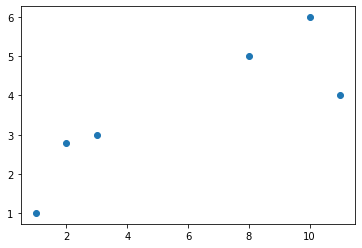

In [2]:
feature1 = [10, 11, 8, 3, 2, 1]
feature2 = [6, 4, 5, 3, 2.8, 1]
plt.scatter(feature1, feature2)
plt.show()

let's shift the (0,0) to the center of data.

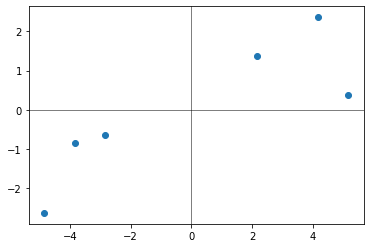

In [3]:
av_1 = sum(feature1) / len(feature1)
av_2 = sum(feature2) / len(feature2)

feature1 = [x - av_1 for x in feature1]
feature2 = [x - av_2 for x in feature2]

plt.scatter(feature1, feature2)
plt.axhline(color='black', lw=0.5)
plt.axvline(color='black', lw=0.5)
plt.show()

## find the best fit line 

Assume best fit line is y = b + a * x

find minmum of sum((yi - b - a * xi) ^ 2 ) for each (xi,yi) 

by the Partial Derivative on a & b

a = ( sum(xi * yi) - n * xbar * ybar ) / sum(xi^2) - n * xbar^2 <br>
b = ybar - a * xbar

where:

xbar = averge(x) <br>
ybar = averge(y)

In [4]:
def best_fit(X, Y):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    a = numer / denum
    b = ybar - a * xbar

    print('best fit line:\ny = {:.2f}x + {:.2f}'.format(a, b))

    return a, b

a, b = best_fit(feature1, feature2)

best fit line:
y = 0.34x + -0.00


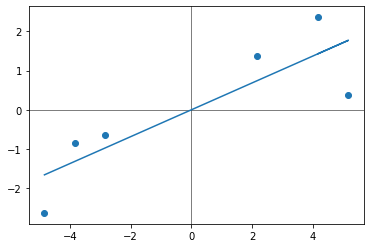

In [5]:
plt.scatter(feature1, feature2)
plt.axhline(color='black', lw=0.5)
plt.axvline(color='black', lw=0.5)

PC1 = [a * xi + b for xi in feature1]
plt.plot(feature1, PC1)
plt.show()

Slope = 0.34, By Pythagorean theorem

In [6]:
x = (50**2 + 17**2)**0.5
print(x)
print(x/x, 50/x, 17/x)

52.81098370604357
1.0 0.9467727448197127 0.32190273323870233


## Image that: 
PC1 = 0.94 * feature1 + 0.32 * feature2 

it can say that PC1 is linear combination of feature1, feature2

[0.94, 0.32] is eigenvector (or singular vector) of PC1 (see p.s.)

sum of square distance (on PC1): d

d is eigen value for PC1

d^0.5 is singular value for PC1

---
p.s.

defination of eigen vector: <br>
AV = λV <br>
-> T is linear opearator, if T(V) = λV <br>
-> V is eigenvector of T

We can regard PC1 as a function that project any vector to line y = 0.34x (projection is a linear opearator)

and then we can find that PC1( [0.94, 0.32]^t ) = λ [0.94, 0.32]^t 

[0.94, 0.32]^t is eigenvector of PC1



In [7]:
# P' is the projection point of P(x, y) on ax + by + c = 0
# P'= (x-at, y-2bt) where t = (ax + by + c) / a**2 + b **2  

def sum_of_square_distance(a, b, c, X, Y):
    sum = 0
    for i, j in zip(X,Y):
        x_proj = i - a*(a*i + b*j + c) / ((a**2) + (b**2))
        y_proj = j - b*(a*i + b*j + c) / ((a**2) + (b**2))
        # sum += (x_proj**2 + y_proj**2)**0.5
        sum += x_proj**2 + y_proj**2
        
    return sum

In [8]:
e1 = sum_of_square_distance(-a, 1, b, feature1, feature2)
print("eigen value for PC1:", e1)
print("singular value for PC1:", e1** 0.5)

eigen value for PC1: 106.40117345669768
singular value for PC1: 10.315094447298952


# Let's find more eigenvector 

because it's 2 dim, we can easily fin another eigenvector PC2

PC2 = -0.28 * feature1 + 0.95 * feature2 

[-0.28, 0.95] is eigenvector of PC2

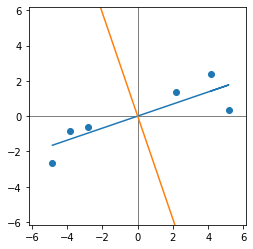

In [9]:
plt.scatter(feature1, feature2)
plt.axhline(color='black', lw=0.5)
plt.axvline(color='black', lw=0.5)

PC1 = [b + a * xi for xi in feature1]
PC2 = [b + (-1/a) * xi for xi in feature1]

plt.plot(feature1, PC1)
plt.plot(feature1, PC2)

max_value = max(feature1 + feature2)+1
plt.xlim(-max_value, max_value)
plt.ylim(-max_value, max_value)
plt.gca().set_aspect('equal', adjustable='box')

plt.show()

In [10]:
e1 = sum_of_square_distance(-a, 1, b, feature1, feature2)
e2 = sum_of_square_distance(1/a, 1, b, feature1, feature2)
print("eigen value of PC1:" , e1)
print("eigen value of PC2:" , e2)
print("")
print("singular value of PC1:" , e1** 0.5)
print("singular value of PC2:" , e2** 0.5)
variation_pc1 = e1 / (len(feature1)-1)
variation_pc2 = e2 / (len(feature1)-1)
total_variation = variation_pc1 + variation_pc2
print("")
print("variation for PC1:", variation_pc1)
print("variation for PC2:", variation_pc2)
print("")
print("PC1 accounts for {:f}% of the total variation around PCs ".format(variation_pc1/ total_variation * 100))
print("PC2 accounts for {:f}% of the total variation around PCs ".format(variation_pc2/ total_variation * 100))

eigen value of PC1: 106.40117345669768
eigen value of PC2: 4.0654932099689916

singular value of PC1: 10.315094447298952
singular value of PC2: 2.0163068243620543

variation for PC1: 21.280234691339537
variation for PC2: 0.8130986419937983

PC1 accounts for 96.319710% of the total variation around PCs 
PC2 accounts for 3.680290% of the total variation around PCs 


# PCA by SVD

We can use SVD to find the eigenvector and eigenvalue

```
   A   =    U  *  S   * VT
(m, n) = (m, m) (m, n) (n,n)
```
or
```
   A   =    U  *  S   * VT
(m, n) = (m, r) (r, r) (r,n)

```
s is singular value <br>
v is eigenvector

![](https://miro.medium.com/max/440/0*8Eigag8mZn9gTFp2)

In [11]:
matrix = np.array([feature1,feature2])
matrix = np.transpose(matrix)
print(matrix)

[[ 4.16666667  2.36666667]
 [ 5.16666667  0.36666667]
 [ 2.16666667  1.36666667]
 [-2.83333333 -0.63333333]
 [-3.83333333 -0.83333333]
 [-4.83333333 -2.63333333]]


In [12]:
u, s, vt = np.linalg.svd(matrix, full_matrices=False)
print(u)
print(s)
print(vt)

[[-0.457541    0.41108679]
 [-0.4836037  -0.69242571]
 [-0.24235653  0.27743163]
 [ 0.27929875  0.17736175]
 [ 0.37710744  0.25097498]
 [ 0.52709504 -0.42442944]]
[10.31600995  2.01161762]
[[-0.94171069 -0.33642381]
 [-0.33642381  0.94171069]]


In [13]:
v = np.transpose(vt)
print(matrix.shape, u.shape, s.shape, vt.shape)
print("singular value:", s[0], s[1])
print("eigen value:", s[0]**2, s[1]**2)
print("eigenvector:", v[0], v[1])

(6, 2) (6, 2) (2,) (2, 2)
singular value: 10.316009946380492 2.011617620932341
eigen value: 106.42006121382123 4.046605452845491
eigenvector: [-0.94171069 -0.33642381] [-0.33642381  0.94171069]


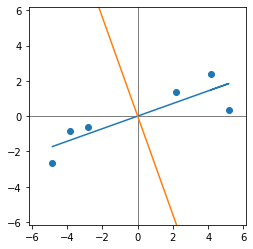

eigen value of PC1: 106.42006121382123
eigen value of PC2: 4.046605452845491

variation for PC1: 21.284012242764245
variation for PC2: 0.8093210905690983

PC1 accounts for 96.336809% of the total variation around PCs 
PC2 accounts for 3.663191% of the total variation around PCs 


In [14]:
plt.scatter(feature1, feature2)
plt.axhline(color='black', lw=0.5)
plt.axvline(color='black', lw=0.5)

PC1 = [0 + v[0][1]/v[0][0] * xi for xi in feature1]
PC2 = [0 + v[1][1]/v[1][0] * xi for xi in feature1]

plt.plot(feature1, PC1)
plt.plot(feature1, PC2)

max_value = max(feature1 + feature2)+1
plt.xlim(-max_value, max_value)
plt.ylim(-max_value, max_value)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

print("eigen value of PC1:" , s[0]**2)
print("eigen value of PC2:" , s[1]**2)
print("")
variation_pc1 = s[0]**2/(len(feature1)-1)
variation_pc2 = s[1]**2/(len(feature1)-1)
print("variation for PC1:", variation_pc1)
print("variation for PC2:", variation_pc2)
print("")
total_variation = variation_pc1 + variation_pc2
print("PC1 accounts for {:f}% of the total variation around PCs ".format(variation_pc1/ total_variation * 100))
print("PC2 accounts for {:f}% of the total variation around PCs ".format(variation_pc2/ total_variation * 100))

To reduce the dimation of sample data ( from 2 dim -> 1 dim) <br>
We can use the projection on PC1 to represent our data 

In [15]:
def get_project(v1, v2):
    v2_norm = np.sqrt(sum(v2**2))
    proj_of_v1_on_v2 = (np.dot(v1, v2)/v2_norm**2)*v2    
    return proj_of_v1_on_v2

def get_distance(v):
    return np.sqrt(sum(v**2))

def get_direction(v1, v2):
    bias = np.dot(np.array([1]*len(v2)), v2)
    if np.dot(v1, v2) >= 0:
        return 1*bias
    else:
        return -1*bias

[6.032791690705604, 6.376434859969306, 3.1955309820348154, -3.6826233526278216, -4.972255244754613, -6.9498789353272885]


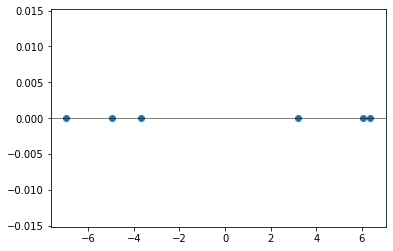

In [16]:
PC1_proj = [get_project(np.array([x, y]), v[0]) for x, y in zip(feature1, feature2)]
PC1_direct = [get_direction(np.array([x, y]), v[0]) for x, y in zip(feature1, feature2)]
PC1_D_X = [d*get_distance(v) for v,d in zip(PC1_proj, PC1_direct)]
print(PC1_D_X)

plt.axhline(color='black', lw=0.5)
plt.scatter(PC1_D_X, [0]*len(PC1_proj))
plt.show()

# What if we have more dimations

In [17]:
f1 = [10, 11, 8, 3, 2, 1]
f2 = [6, 4, 5, 3, 2.8, 1]
f3 = [8, 2, 9, 1.5, 5, 5]
f4 = [7, 6, 5, 4, 8, 9.9]
matrix = np.array([f1,f2,f3,f4])

In [18]:
new_matrix = []
for m in matrix:
    av_m = sum(m)/len(m)
    new_row = []
    for i in m:
        new_row.append(i - av_m)
        
    new_matrix.append(new_row)
    
new_matrix = np.transpose(new_matrix)
matrix = np.array(new_matrix)
print(matrix)

[[ 4.16666667  2.36666667  2.91666667  0.35      ]
 [ 5.16666667  0.36666667 -3.08333333 -0.65      ]
 [ 2.16666667  1.36666667  3.91666667 -1.65      ]
 [-2.83333333 -0.63333333 -3.58333333 -2.65      ]
 [-3.83333333 -0.83333333 -0.08333333  1.35      ]
 [-4.83333333 -2.63333333 -0.08333333  3.25      ]]


In [19]:
u, s, vt = np.linalg.svd(matrix, full_matrices=False)
v = np.transpose(vt)
print(u)
print(s)
print(vt)

[[-0.47804775 -0.30996346  0.12886187  0.5708065 ]
 [-0.37724545  0.59899184  0.47732695 -0.22423541]
 [-0.34213505 -0.3886833  -0.48026426 -0.54712841]
 [ 0.28660816  0.53973035 -0.57495661  0.13195699]
 [ 0.36834981 -0.16565633  0.00828715  0.42467387]
 [ 0.54247028 -0.27441911  0.44074489 -0.35607355]]
[10.7650126   6.78720558  4.01566014  1.12819228]
[[-0.88511401 -0.33945797 -0.24840432  0.19908984]
 [ 0.20527868 -0.07754232 -0.90915993 -0.35394361]
 [ 0.3559939  -0.24398558 -0.23759583  0.87022273]
 [-0.21840832  0.90511133 -0.23509942  0.27892571]]


In [20]:
variations = s**2/(len(f1)-1)
variations = variations/sum(variations) * 100
print(variations)

v = np.transpose(vt)
PC1 = v[0]
PC2 = v[1]
print(PC1, PC2)
print(v[:2])

[64.61416017 25.68506248  8.9910936   0.70968376]
[-0.88511401  0.20527868  0.3559939  -0.21840832] [-0.33945797 -0.07754232 -0.24398558  0.90511133]
[[-0.88511401  0.20527868  0.3559939  -0.21840832]
 [-0.33945797 -0.07754232 -0.24398558  0.90511133]]


In [21]:
PC1_proj = [get_project(np.array([i for i in w]), PC1) for w in matrix]
PC1_direct = [get_direction(np.array([i for i in w]), PC1) for w in matrix]
PC1_distance =  [d*get_distance(v) for v,d in zip(PC1_proj, PC1_direct)]
print(PC1_distance)

[1.214789228785195, 2.957160479158687, -0.06370549013609647, -0.9114949666494053, -1.5710895441447368, -1.6256597070136425]


In [22]:
PC2_proj = [get_project(np.array([i for i in w]), PC2) for w in matrix]
PC2_direct = [get_direction(np.array([i for i in w]), PC2) for w in matrix]
PC2_distance =  [d*get_distance(v) for v,d in zip(PC2_proj, PC2_direct)]
print(PC2_distance)

[-0.48648361880748686, -0.3950760146259753, -0.8032974322392933, -0.12532318556130675, 0.6367052243285384, 1.173475026905524]


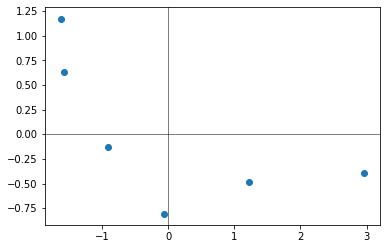

In [23]:
plt.axhline(color='black', lw=0.5)
plt.axvline(color='black', lw=0.5)
plt.scatter(PC1_distance, PC2_distance)
plt.show()

# Complete code !!

In [24]:
import matplotlib.pyplot as plt
import numpy as np

class PCA():
    def __init__(self, matrix):
        self.matrix = self.__shift(matrix)
        
        u, s, vt = np.linalg.svd(self.matrix, full_matrices=False)
        variations = s**2/(len(f1)-1)
        v = np.transpose(vt)
        
        self.singular_values = s
        self.eigenvectors = v[:len(s)]
        self.eigen_values = s**2
        self.PCs = variations/sum(variations)
        
    def __shift(self, matrix):
        new_matrix = []
        for m in matrix:
            av_m = sum(m)/len(m)
            new_row = []
            for i in m:
                new_row.append(i - av_m)

            new_matrix.append(new_row)
        new_matrix = np.transpose(new_matrix)
        return new_matrix

    def __get_project(self, v1, v2):
        v2_norm = np.sqrt(sum(v2**2))
        proj_of_v1_on_v2 = (np.dot(v1, v2)/v2_norm**2)*v2    
        return proj_of_v1_on_v2

    def __get_distance(self, v):
        return np.sqrt(sum(v**2))

    def __get_direction(self, v1, v2):
        bias = np.dot(np.array([1]*len(v2)), v2)
        if np.dot(v1, v2) >= 0:
            return 1*bias
        else:
            return -1*bias
        
    def show_PC_variations(self):
        x = np.arange(len(self.PCs))
        plt.bar(x, (self.PCs * 100).tolist())
        plt.xticks(x, ["PC"+str(i) for i in x])
        plt.xlabel('PCA')
        plt.ylabel('principal components(%)')
        plt.show()

    def show_2_PCA(self, pc1, pc2):
        PC1_proj = [self.__get_project(np.array([i for i in w]), self.eigenvectors[pc1]) for w in self.matrix]
        PC1_direct = [self.__get_direction(np.array([i for i in w]), self.eigenvectors[pc1]) for w in self.matrix]
        PC1_distance =  [d*self.__get_distance(v) for v,d in zip(PC1_proj, PC1_direct)]
        
        PC2_proj = [self.__get_project(np.array([i for i in w]), self.eigenvectors[pc2]) for w in self.matrix]
        PC2_direct = [self.__get_direction(np.array([i for i in w]), self.eigenvectors[pc2]) for w in self.matrix]
        PC2_distance =  [d*self.__get_distance(v) for v,d in zip(PC2_proj, PC2_direct)]
        
        plt.axhline(color='black', lw=0.5)
        plt.axvline(color='black', lw=0.5)
        plt.scatter(PC1_distance, PC2_distance)
        for n in range(len(PC1_distance)):
            plt.annotate(str(n), (PC1_distance[n], PC2_distance[n]))
            
        plt.xlabel("PC" + str(pc1) + " (" + str(round(self.PCs[pc1]*100, 2)) +"%)")
        plt.ylabel("PC" + str(pc2) + " (" + str(round(self.PCs[pc2]*100, 2)) +"%)")
        plt.show()
        
    def show_1_PCA(self, pc1):
        PC1_proj = [self.__get_project(np.array([i for i in w]), self.eigenvectors[pc1]) for w in self.matrix]
        PC1_direct = [self.__get_direction(np.array([i for i in w]), self.eigenvectors[pc1]) for w in self.matrix]
        PC1_distance =  [d*self.__get_distance(v) for v,d in zip(PC1_proj, PC1_direct)]
        
        plt.axhline(color='black', lw=0.5)
        plt.scatter(PC1_distance, [0]*len(PC1_distance))
        for n in range(len(PC1_distance)):
            plt.annotate(str(n), (PC1_distance[n], 0))
        plt.xlabel("PC" + str(pc1) + " (" + str(round(self.PCs[pc1]*100, 2)) +"%)")
        plt.show()

In [25]:
#sample 0 ~ 5
f0 = [10, 11, 8, 3, 2, 1]
f1 = [6, 4, 5, 3, 0.7, 1]
f2 = [8, 2, 9, 1.5, 5, 5]
f3 = [7, 6, 5, 4, 8, 8.5]
matrix = np.array([f0,f1,f2,f3])

pca = PCA(matrix)

In [26]:
pca.eigenvectors

array([[-0.86889937,  0.24093226,  0.33542894, -0.27286069],
       [-0.40900889, -0.02568878, -0.35886838,  0.83860915],
       [-0.25039745, -0.92977389, -0.15847275, -0.21842166],
       [ 0.12258356, -0.27715023,  0.85649711,  0.41782021]])

In [27]:
pca.eigen_values

array([120.08515057,  44.27951779,  13.30470227,   1.38896271])

In [28]:
pca.PCs

array([0.67064821, 0.24729102, 0.07430373, 0.00775704])

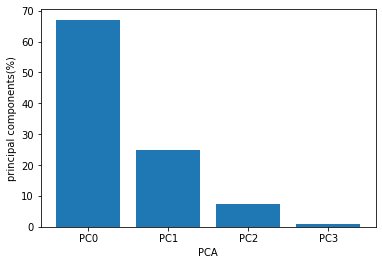

In [29]:
pca.show_PC_variations()

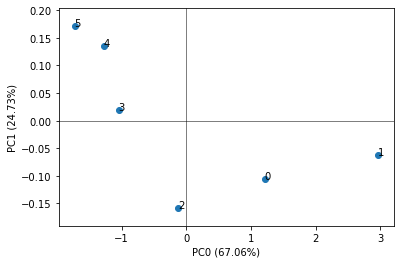

In [30]:
pca.show_2_PCA(0,1)

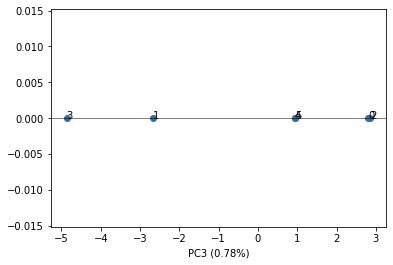

In [31]:
pca.show_1_PCA(3)

# Compare answer with sklearn

[10.95833703  6.65428567  3.64756114  1.17854262]
[0.67064821 0.24729102 0.07430373 0.00775704]


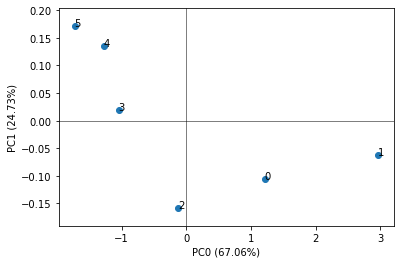

In [32]:
# feature1 = [10, 11, 8, 3, 2, 1]
# feature2 = [6, 4, 5, 3, 2.8, 1]
# matrix = np.array([feature1,feature2])
f1 = [10, 11, 8, 3, 2, 1]
f2 = [6, 4, 5, 3, 0.7, 1]
f3 = [8, 2, 9, 1.5, 5, 5]
f4 = [7, 6, 5, 4, 8, 8.5]
matrix = np.array([f1,f2,f3,f4])
pca = PCA(matrix)
print(pca.singular_values)
print(pca.PCs)
pca.show_2_PCA(0,1)

In [33]:
from sklearn.decomposition import PCA as SK_PCA

# feature1 = [10, 11, 8, 3, 2, 1]
# feature2 = [6, 4, 5, 3, 2.8, 1]
# matrix = np.array([feature1,feature2])
f1 = [10, 11, 8, 3, 2, 1]
f2 = [6, 4, 5, 3, 0.7, 1]
f3 = [8, 2, 9, 1.5, 5, 5]
f4 = [7, 6, 5, 4, 8, 8.5]
matrix = np.array([f1,f2,f3,f4])
matrix = np.transpose(matrix)
pca = SK_PCA(n_components=4)
pca.fit(matrix)
print(pca.singular_values_)
print(pca.explained_variance_ratio_)

[10.95833703  6.65428567  3.64756114  1.17854262]
[0.67064821 0.24729102 0.07430373 0.00775704]


[10.31600995  2.01161762]
[0.96336809 0.03663191]


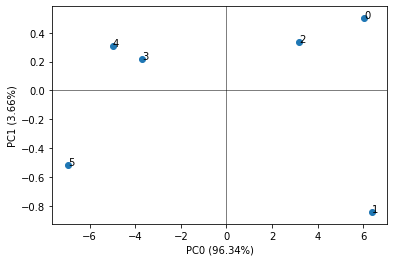

In [34]:
feature1 = [10, 11, 8, 3, 2, 1]
feature2 = [6, 4, 5, 3, 2.8, 1]
matrix = np.array([feature1,feature2])
# f1 = [10, 11, 8, 3, 2, 1]
# f2 = [6, 4, 5, 3, 0.7, 1]
# f3 = [8, 2, 9, 1.5, 5, 5]
# f4 = [7, 6, 5, 4, 8, 8.5]
# matrix = np.array([f1,f2,f3,f4])
pca = PCA(matrix)
print(pca.singular_values)
print(pca.PCs)
pca.show_2_PCA(0,1)